
<h2>FACE RECOGNITION AND GROUPING</h2></div>'


In [14]:
!cp '/content/drive/MyDrive/Colab Notebooks/new_data/test.zip'  '/content/'
!cp '/content/drive/MyDrive/Colab Notebooks/new_data/train.zip' '/content/'

In [ ]:
!unzip '/content/test.zip'

Archive:  /content/test.zip
   creating: content/test/
   creating: content/test/Sundar_Pichai/
  inflating: content/test/Sundar_Pichai/sundarr40.png  
  inflating: content/test/Sundar_Pichai/Sundar _Pichai95.png  
 extracting: content/test/Sundar_Pichai/Sundar _Pichai63.png  
  inflating: content/test/Sundar_Pichai/sundarr3.png  
 extracting: content/test/Sundar_Pichai/Sundar _Pichai7.png  
 extracting: content/test/Sundar_Pichai/Sundar _Pichai66.png  
  inflating: content/test/Sundar_Pichai/sundarr37.png  
  inflating: content/test/Sundar_Pichai/Sundar _Pichai26.png  
  inflating: content/test/Sundar_Pichai/Sundar _Pichai72.png  
  inflating: content/test/Sundar_Pichai/Sundar _Pichai15.png  
  inflating: content/test/Sundar_Pichai/sundarr114.png  
 extracting: content/test/Sundar_Pichai/sundarr91.png  
  inflating: content/test/Sundar_Pichai/Sundar _Pichai117.png  
 extracting: content/test/Sundar_Pichai/Sundar _Pichai41.png  
  inflating: content/test/Sundar_Pichai/sundarr59.png  
 

In [ ]:
!unzip '/content/train.zip'

Archive:  /content/train.zip
   creating: content/train/
   creating: content/train/Sundar_Pichai/
 extracting: content/train/Sundar_Pichai/sundarr92.png  
 extracting: content/train/Sundar_Pichai/Sundar _Pichai53.png  
 extracting: content/train/Sundar_Pichai/sundarr36.png  
 extracting: content/train/Sundar_Pichai/sundarr48.png  
  inflating: content/train/Sundar_Pichai/sundarr44.png  
  inflating: content/train/Sundar_Pichai/Sundar _Pichai82.png  
  inflating: content/train/Sundar_Pichai/sundarr47.png  
 extracting: content/train/Sundar_Pichai/sundarr110.png  
  inflating: content/train/Sundar_Pichai/sundarr70.png  
  inflating: content/train/Sundar_Pichai/Sundar _Pichai110.png  
 extracting: content/train/Sundar_Pichai/sundarr104.png  
 extracting: content/train/Sundar_Pichai/sundarr134.png  
  inflating: content/train/Sundar_Pichai/Sundar _Pichai80.png  
  inflating: content/train/Sundar_Pichai/sundarr101.png  
 extracting: content/train/Sundar_Pichai/sundarr63.png  
 extracting: 

In [ ]:
import os
from keras.layers import Input,Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
train_path='/content/content/train'
test_path='/content/content/test'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(5,activation='softmax')(x)

In [ ]:
from keras.models import Model
model=Model(inputs=vgg.input,outputs=prediction)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import re
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),class_mode='categorical')


Found 920 images belonging to 5 classes.
Found 234 images belonging to 5 classes.


In [ ]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=10)

<ipython-input-14-443ec6d8a5ed>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=10)


Epoch 1/10
29/29 [==============================] - 32s 678ms/step - loss: 1.2695 - accuracy: 0.5946 - val_loss: 0.3997 - val_accuracy: 0.8932
Epoch 2/10
29/29 [==============================] - 12s 424ms/step - loss: 0.3172 - accuracy: 0.9174 - val_loss: 0.1998 - val_accuracy: 0.9573
Epoch 3/10
29/29 [==============================] - 13s 447ms/step - loss: 0.1689 - accuracy: 0.9685 - val_loss: 0.1565 - val_accuracy: 0.9701
Epoch 4/10
29/29 [==============================] - 13s 446ms/step - loss: 0.1387 - accuracy: 0.9717 - val_loss: 0.1284 - val_accuracy: 0.9744
Epoch 5/10
29/29 [==============================] - 15s 506ms/step - loss: 0.1091 - accuracy: 0.9783 - val_loss: 0.1300 - val_accuracy: 0.9658
Epoch 6/10
29/29 [==============================] - 13s 451ms/step - loss: 0.0774 - accuracy: 0.9902 - val_loss: 0.1049 - val_accuracy: 0.9786
Epoch 7/10
29/29 [==============================] - 19s 646ms/step - loss: 0.0789 - accuracy: 0.9880 - val_loss: 0.1338 - val_accuracy: 0.9701

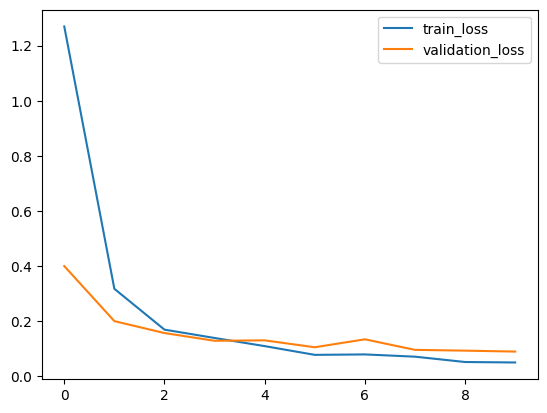

In [ ]:
#loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss') #loss is stored in history attribute of model
plt.plot(r.history['val_loss'],label='validation_loss') #loss of test data
plt.legend()
plt.show()

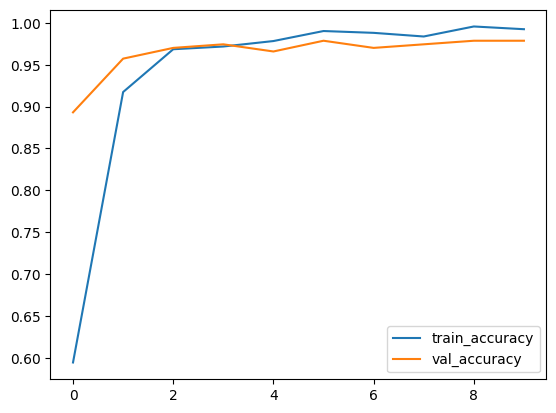

In [ ]:
#accuracy
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/new_data/FACE_GROUPING.h5')

In [3]:
#importing the saved model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/new_data/FACE_GROUPING.h5')

# Face Grouping

In [1]:
!unzip '/content/pred.zip'

Archive:  /content/pred.zip
   creating: photo/
  inflating: photo/1000.jpeg         
  inflating: photo/1005.jpeg         
  inflating: photo/an16.jpeg         
  inflating: photo/bi4.jpeg          
  inflating: photo/m5.jpeg           
  inflating: photo/d6.jpeg           
  inflating: photo/bi17.jpeg         
  inflating: photo/m3.jpeg           
  inflating: photo/s9.jpeg           
  inflating: photo/s6.jpeg           
  inflating: photo/s5.jpeg           
  inflating: photo/bi16.jpeg         
  inflating: photo/an20.jpeg         
  inflating: photo/bi1.jpeg          
  inflating: photo/bm6.jpeg          
  inflating: photo/m1.jpeg           
  inflating: photo/d3.jpeg           
  inflating: photo/bi2.jpeg          
  inflating: photo/an18.jpeg         
  inflating: photo/1003.jpeg         
  inflating: photo/images_009.jpeg   
  inflating: photo/d2.jpeg           
  inflating: photo/s4.jpeg           
  inflating: photo/mb4.jpeg          
  inflating: photo/bi13.jpeg         
  

In [4]:
import os
import cv2
import shutil
import numpy as np
from keras.preprocessing import image

In [5]:
class_labels = {
    0: 'Anushka_Sharma',
    1: 'Bill_Gates',
    2: 'Dalai_Lama',
    3: 'Narendra_Modi',
    4: 'Sundar_Pichai'
}

In [6]:
def preprocess_image(image_path):
    external_image = cv2.imread(image_path)
    external_image = cv2.cvtColor(external_image, cv2.COLOR_BGR2RGB)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(external_image, scaleFactor=1.1, minNeighbors=5)

    processed_faces = []
    for i, (x, y, w, h) in enumerate(faces):
        face_image = external_image[y:y + h, x:x + w]
        face_image = cv2.resize(face_image, (224, 224))

        face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR)
        face_image = face_image / 255.0
        face_image = np.expand_dims(face_image, axis=0)

        processed_faces.append((x, y, w, h, face_image))

    return processed_faces


In [7]:
def crop_full_body(image_path, model, class_labels, output_folder):
    processed_faces = preprocess_image(image_path)
    external_image = cv2.imread(image_path)
    external_image = cv2.cvtColor(external_image, cv2.COLOR_BGR2RGB)

    for i, (x, y, w, h, face_image) in enumerate(processed_faces):
        predicted_classes = model.predict(face_image)
        predicted_class_index = np.argmax(predicted_classes)
        predicted_class_name = class_labels[predicted_class_index]

        if predicted_class_name != 'Unknown':

            person_folder = os.path.join(output_folder, predicted_class_name)
            os.makedirs(person_folder, exist_ok=True)
            full_body_filename = os.path.splitext(os.path.basename(image_path))[0] + f'_full_body_{i}.jpg'


            body_x = x - 20
            body_y = y
            body_w = w + 60
            body_h = h + (external_image.shape[0] - (y + h))



            full_body_image = external_image[body_y:body_y + body_h, body_x:body_x + body_w]


            cv2.imwrite(os.path.join(person_folder, full_body_filename), cv2.cvtColor(full_body_image, cv2.COLOR_RGB2BGR))


In [8]:
input_folder = '/content/photo'
output_folder = '/content/output'

In [9]:
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        crop_full_body(image_path, model, class_labels, output_folder)


1/1 [==============================] - 0s 17ms/step


In [12]:
import shutil
folder_path='/content/sample_data'
shutil.rmtree(folder_path)

In [13]:
folder_path='/content/output'
shutil.make_archive("output_images",'zip',folder_path)

'/content/output_images.zip'